In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import StandardScaler

%cd /home/david/Vídeos
kc = pd.read_csv("datostonnetsjuntos9sep.csv")
print(kc.head())
print(kc.shape)
print(kc.dtypes)

/home/david/Vídeos
   Unnamed: 0  chroma_stft  spectral_centroid  spectral_bandwidth   tonnets  \
0           0     0.690560        3640.598838         3726.118177  0.006110   
1           1     0.337765        4245.616677         2915.669095  0.002594   
2           2     0.216557        4281.854638         2824.307292  0.001451   
3           3     0.666285        3699.865800         3743.574753  0.004117   
4           4     0.433324        3534.083397         3113.467248  0.005079   

         te       ems         md          p label  
0  0.998984  0.930453 -11.735779   1.173283  Alta  
1  0.995157  0.948503 -12.204839  36.780960  Alta  
2  0.994575  0.968675 -12.089845  62.288357  Alta  
3  0.998354  0.910689 -11.885508   2.006087  Alta  
4  0.996233  0.971866 -12.098396  19.736820  Alta  
(23059, 10)
Unnamed: 0              int64
chroma_stft           float64
spectral_centroid     float64
spectral_bandwidth    float64
tonnets               float64
te                    float64
em

In [36]:
kc= kc[pd.notnull(kc['te'])]
d=kc.iloc[:,1:9].copy()
print(d.shape)
d.head()

(23040, 8)


,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,te,ems,md,p
0,0.690560,3640.598838,3726.118177,0.006110,0.998984,0.930453,-11.735779,1.173283
1,0.337765,4245.616677,2915.669095,0.002594,0.995157,0.948503,-12.204839,36.780960
2,0.216557,4281.854638,2824.307292,0.001451,0.994575,0.968675,-12.089845,62.288357
3,0.666285,3699.865800,3743.574753,0.004117,0.998354,0.910689,-11.885508,2.006087
4,0.433324,3534.083397,3113.467248,0.005079,0.996233,0.971866,-12.098396,19.736820


In [38]:
y=kc["label"]
trans={'Alta':2,'Baja':0,'Media':1}
ypruebaP=[trans[item] for item in y]

In [39]:
x= StandardScaler().fit_transform(d.values)  ##give numpy array values
scalx=pd.DataFrame(x,index=d.index,columns=d.columns) #so we need to transform it 
d=scalx.copy()

scalx["label"]=ypruebaP
scalx.head()
kc=scalx.copy()
kc.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,te,ems,md,p,label
0,0.534250,0.322294,2.174261,-0.001151,0.657102,-0.639829,-0.579306,-0.225362,2
1,-0.892178,0.695371,0.431782,-0.005668,0.171279,-0.005476,-0.731986,-0.114337,2
2,-1.382249,0.717717,0.235353,-0.007137,0.097483,0.703400,-0.694555,-0.034805,2
3,0.436101,0.358840,2.211793,-0.003711,0.577077,-1.334370,-0.628043,-0.222765,2
4,-0.505811,0.256612,0.857051,-0.002475,0.307925,0.815542,-0.697338,-0.167481,2


/home/david/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


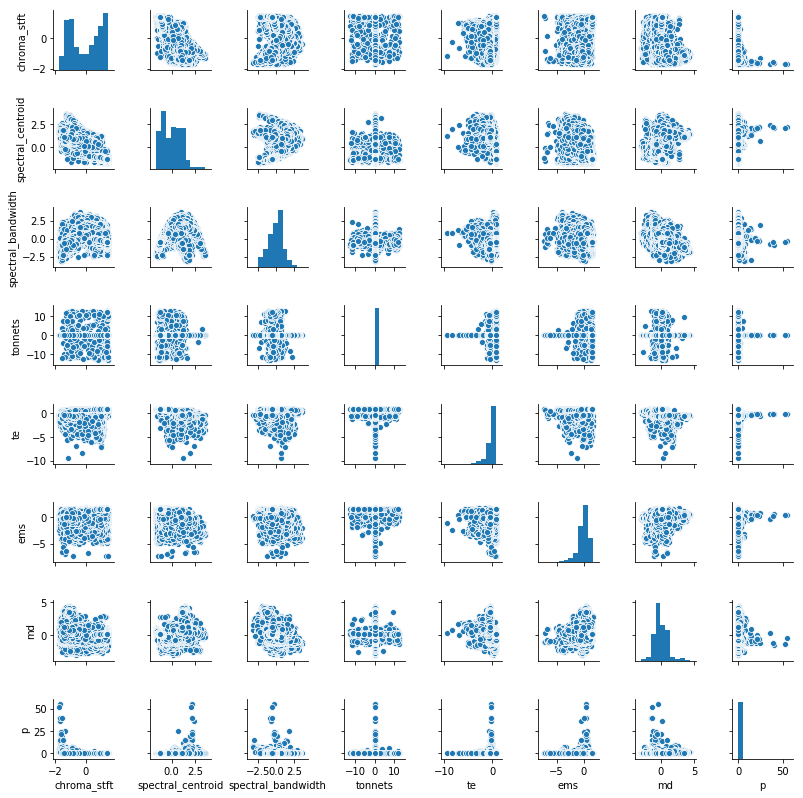

In [44]:
p = sns.pairplot(kc[['chroma_stft','spectral_centroid','spectral_bandwidth','tonnets','te','ems','md','p']], palette='afmhot',size=1.4)

In [45]:
kc = kc.drop(['label'], axis=1)


In [46]:
X = kc.as_matrix()


/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [47]:
colnames = kc.columns


In [51]:
# create a lasso regressor
lasso = Lasso(alpha=0.2)

# Fit the regressor to the data
lasso.fit(X,ypruebaP)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.  0.  0. -0.  0. -0. -0.  0.]


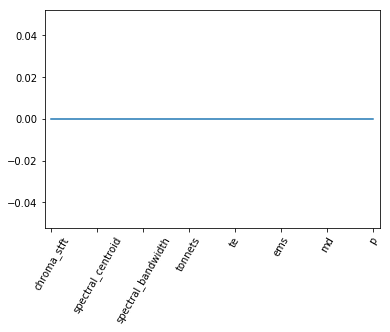

In [50]:
plt.plot(range(len(colnames)), lasso_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

In [54]:
%pip install mord

  Stored in directory: /home/david/.cache/pip/wheels/98/14/b2/244c2cec93a0c6edb29b488bd6b2710ded7e9d457033b86366
Successfully built mord
Note: you may need to restart the kernel to use updated packages.


In [63]:
import mord as m
ori=m.OrdinalRidge(alpha=0.5)

In [64]:
ori.fit(X,ypruebaP)

OrdinalRidge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
ordi_coef=ori.coef_
colnames = kc.columns


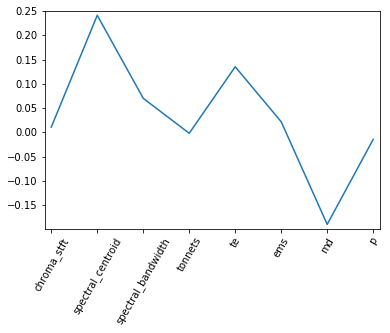

In [66]:
plt.plot(range(len(colnames)), ordi_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

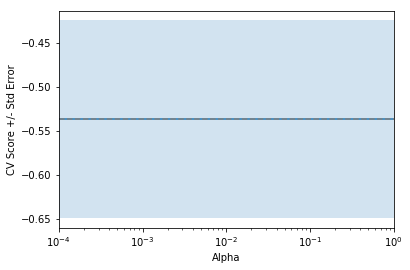

In [71]:
from sklearn.linear_model import Ridge
y=ypruebaP
# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = m.OrdinalRidge()

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)